In [1]:
# import packages
from Bio.Seq import Seq
from Bio import SeqIO
from Bio import pairwise2
from Bio.SubsMat import MatrixInfo as matlist
from Bio.pairwise2 import format_alignment
from Bio import AlignIO
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\Jule Brenningmeyer\anaconda3\lib\site-packages\Bio\SubsMat\__init__.py:126: BiopythonDeprecationWarning: Bio.SubsMat has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.substitution_matrices as a replacement, and contact the Biopython developers if you still need the Bio.SubsMat module.
  warnings.warn(


In [2]:
# Load fasta file with sequences
sequence_32RdhA = []
sequence_32RdhA_id = []
sequences_fasta = SeqIO.parse("RdhA_Dehalococcoides_strain_CBDB1_sequence.fasta", "fasta")

# extract id and sequence and store into two separate lists
for sequence in sequences_fasta:
    sequence_32RdhA.append(str(sequence.seq))
    sequence_32RdhA_id.append(str(sequence.id))

print(sequence_32RdhA)
print(sequence_32RdhA_id)

['MSKFHSMVSRRDFMKGLGMAGAGIGAVAASAPVFHDIDELIASDTAVQPRPWWVKERPIDDPTIEVDFGMMERHDGRDQGQSARVRAIYYGADRVLGAAALSAAELAERTASNYPGYTYRSRALAGSFKRVSQGTSPGWAETKDPAPVKTPEERGEPKWTGTPEEASRMLRAAMRAYGASLVGYTELTQEHRDHVIFSYEKGDSNNEKYIGTTIPVTAARPIVFENVPKAYETTEKLVIPNVPLWEIALSTQGSNELWRSAGTLLGGMANGNTFYNCANLHASTYNFLRYLGYQLIGTIGNDARYVGSEGGAAIMAGLGEASRQKLYTLTPEYGAPGRLYGVLTDLPLEPTHPIDAGIYRFCHSCQKCADSCPPQCISKEKEPSWDLPLTEGKETIYSVKGTKAFYNNLPLCRQYSNETSHGCRICWGECTFTVNRGALVHQIIKGTIANIPLFNTYFYKLGDAFGYGTDPEKAEAWWDLSLPTLGQDSTIVAADAGYGK', 'MGNFHSSLSRRDFMKGLGLAGAGIGAVAAAAPVFHDLDEVASADSSVNKRPWWVREVDKPTIEIDWSKTSSLPFPQEGCHLPPLLAEFVGWDRVNSAMAQGVAALNAGAKKTGSKEAISLLDTSMQEAAWPHFIAHAGWREPVYPALEGAAPIPELVGQTYTHESFGVPRWESTPEENFALLKSAMRFFGAGQIASIELDANVKSMFYPVDASRMFFNGPPMAYGFEDCDNGYVTDTHFIIPNKARWVVTYTTPMPKEMYRTAPSGVCYAANMSRYRLNQETMACVQKFLLGLGYQGLQSAPWPNGICPSPAVATLSGLGEMDRINQCVIPEEGAVVGIYKFITDLPLPVSKPIDFGAFRFCHSCRKCADTCPAKAISFEEEPTWEPAGPWSTGGKKAYYKNEPECKLYQHSTGATCQICTGVCVFNVNTKAMIHEIVKSTLSTTGIFNSFLWKADVAFGYGHHDAAEWWDLDLPRYGFDTTMGVRDGGYGK',

In [3]:
#load pam30 matrix
matrix = matlist.pam30
# create list to store score values
score_list30 = []
alignment_len_30 = []

# loop through sequence list to compare sequences with each other
for i in range(len(sequence_32RdhA)-1):
    seq1 = sequence_32RdhA[i]
    scoreseq1=[] # new list to store scores for one time looping through
    for j in range(1,len(sequence_32RdhA)):
        seq2 = sequence_32RdhA[j]
        alignment1 = pairwise2.align.globaldx(seq1, seq2, matrix)[0] 
        scoreseq1.append(alignment1.score)
        alignment_len_30.append(len(alignment1[0])) #legth of the alignment
    # append to one time looping score list to overall score list
    score_list30.extend(scoreseq1)
    

# display calculated store list
print(score_list30)
print(alignment_len_30)


[1880.0, 1751.0, 1913.0, 1917.0, 1727.0, 1725.0, 1836.0, 1752.0, 1744.0, 1726.0, 1817.0, 2064.0, 1687.0, 1786.0, 1901.0, 1506.0, 1819.0, 1694.0, 1594.0, 1820.0, 1908.0, 1891.0, 1773.0, 1612.0, 1797.0, 2031.0, 1452.0, 1818.0, 1776.0, 1774.0, 1811.0, 3785.0, 1815.0, 1885.0, 1947.0, 1766.0, 1818.0, 1753.0, 1743.0, 1789.0, 1870.0, 1822.0, 1840.0, 1822.0, 1771.0, 2118.0, 1522.0, 1835.0, 1777.0, 1611.0, 1885.0, 2187.0, 1955.0, 1805.0, 1595.0, 1818.0, 2056.0, 1550.0, 1809.0, 1836.0, 1719.0, 1863.0, 1815.0, 3817.0, 1693.0, 1783.0, 2528.0, 2141.0, 2010.0, 1828.0, 1879.0, 2627.0, 1787.0, 1719.0, 2557.0, 1874.0, 1750.0, 1488.0, 1957.0, 1941.0, 1554.0, 2179.0, 1747.0, 1871.0, 3523.0, 1578.0, 1827.0, 1893.0, 1506.0, 2074.0, 1797.0, 1741.0, 1862.0, 1885.0, 1693.0, 3664.0, 2453.0, 1725.0, 1719.0, 1784.0, 1758.0, 1748.0, 1798.0, 1786.0, 1918.0, 1777.0, 1883.0, 1899.0, 1432.0, 1687.0, 1717.0, 1579.0, 1815.0, 1963.0, 2365.0, 1704.0, 1594.0, 1740.0, 2083.0, 1483.0, 1724.0, 1848.0, 1770.0, 1816.0, 1947.0,

In [4]:
 #load pam250 matrix
matrix = matlist.pam250
# create list to store score values
score_list250 = []
alignment_len_250 = []

# loop through sequence list to compare sequences with each other
for i in range(len(sequence_32RdhA)-1):
    seq1 = sequence_32RdhA[i]
    scoreseq1=[] # new list to store scores for one time looping through
    for j in range(1,len(sequence_32RdhA)):
        seq2 = sequence_32RdhA[j]
        alignment1 = pairwise2.align.globaldx(seq1, seq2, matrix)[0] 
        scoreseq1.append(alignment1.score)
        alignment_len_250.append(len(alignment1[0])) #legth of the alignment
    # append to one time looping score list to overall score list
    score_list250.extend(scoreseq1)

# display calculated store list
print(score_list250)
print(alignment_len_250)

[1503.0, 1445.0, 1523.0, 1506.0, 1415.0, 1456.0, 1475.0, 1446.0, 1424.0, 1394.0, 1446.0, 1632.0, 1394.0, 1446.0, 1487.0, 1200.0, 1461.0, 1405.0, 1326.0, 1524.0, 1496.0, 1506.0, 1454.0, 1313.0, 1440.0, 1571.0, 1191.0, 1476.0, 1425.0, 1433.0, 1516.0, 2572.0, 1481.0, 1494.0, 1534.0, 1468.0, 1483.0, 1456.0, 1423.0, 1463.0, 1499.0, 1463.0, 1522.0, 1501.0, 1456.0, 1649.0, 1230.0, 1466.0, 1458.0, 1375.0, 1539.0, 1741.0, 1592.0, 1491.0, 1311.0, 1471.0, 1647.0, 1271.0, 1488.0, 1481.0, 1423.0, 1540.0, 1481.0, 2575.0, 1375.0, 1432.0, 1939.0, 1686.0, 1575.0, 1487.0, 1524.0, 1965.0, 1458.0, 1432.0, 1909.0, 1495.0, 1396.0, 1215.0, 1598.0, 1527.0, 1307.0, 1737.0, 1394.0, 1469.0, 2451.0, 1294.0, 1470.0, 1495.0, 1232.0, 1654.0, 1456.0, 1415.0, 1549.0, 1494.0, 1375.0, 2457.0, 1882.0, 1418.0, 1428.0, 1428.0, 1428.0, 1418.0, 1435.0, 1469.0, 1499.0, 1431.0, 1467.0, 1532.0, 1174.0, 1385.0, 1425.0, 1279.0, 1467.0, 1557.0, 1850.0, 1380.0, 1290.0, 1436.0, 1646.0, 1188.0, 1412.0, 1461.0, 1433.0, 1492.0, 1534.0,

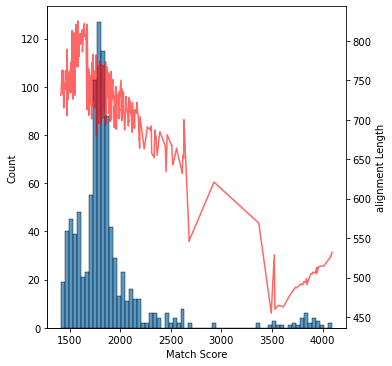

In [9]:
#bar plot of pam30

s = sns.displot(score_list30)
plt.xlabel("Match Score")

#plot lenght to the scores
sorting = np.argsort(score_list30) #sort for plotting
ax2 = plt.twinx() #second axis
ax2.set_ylabel("alignment Length")
length= alignment_len_30
plt.plot(np.array(score_list30)[sorting], np.array(length)[sorting], c="red", alpha=.6)

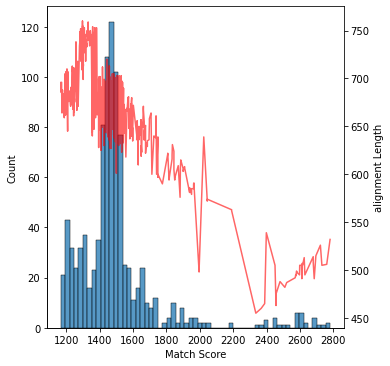

In [8]:
#bar plot of pam30
#plot all scores
s = sns.displot(score_list250)
plt.xlabel("Match Score")

#plot lenght to the scores
sorting = np.argsort(score_list250) #sort for plotting
ax2 = plt.twinx() #second axis
ax2.set_ylabel("alignment Length")
length= alignment_len_250
plt.plot(np.array(score_list250)[sorting], np.array(length)[sorting], c="red", alpha=.6)

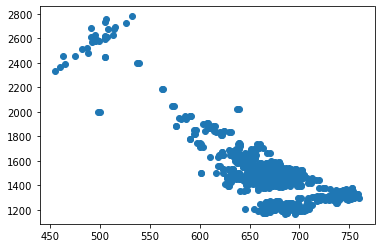

In [7]:
plt.scatter(length, score_list250)